In [1]:
from util.batteryreader import get_battery_details
from util.GurobiOptimizer import GurobiOptimizer

index, available, SOC_a_v, SOC_d_v, t_a_v, t_d_v = get_battery_details(window_length = 48)

In [2]:
GurobiOptimizer = GurobiOptimizer()

In [3]:
for i in range(len(available)):  
    
    print(f"Series num: {i}", index[i])
    
    
    available_current = []
    t_a_v_current = []
    t_d_v_current = []
    SOC_a_v_current = []
    SOC_d_v_current = []
    
    for batt in range(len(available[i])):
        
        if 1 in available[i][batt][24:]:
            available_current.append(available[i][batt][24:])
            t_a_v_current.append(t_a_v[i][batt]-24)
            t_d_v_current.append(t_d_v[i][batt]-24)
            SOC_a_v_current.append(SOC_a_v[i][batt])
            SOC_d_v_current.append(SOC_d_v[i][batt])

    initial_demand, final_grid_demand, charging_demand, pv = GurobiOptimizer.optimize(index[i], available_current, t_a_v_current, t_d_v_current, SOC_a_v_current, SOC_d_v_current)

    break

Series num: 0 10530
Set parameter Username
Set parameter LicenseID to value 2725759
Academic license - for non-commercial use only - expires 2026-10-21


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Core(TM) i9-14900KF, instruction set [SSE2|AVX|AVX2]
Thread count: 32 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 6050 rows, 14688 columns and 29328 nonzeros
Model fingerprint: 0x40b1fbdb
Variable types: 8832 continuous, 5856 integer (5856 binary)
Coefficient statistics:
  Matrix range     [6e-01, 1e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [2e-01, 1e+00]
  RHS range        [3e-01, 7e+01]
Found heuristic solution: objective 1104.1988940
Presolve removed 4445 rows and 10085 columns
Presolve time: 0.01s
Presolved: 1605 rows, 4603 columns, 11334 nonzeros
Found heuristic solution: objective 1087.2736440
Variable types: 4603 continuous, 0 integer (0 binary)

Root relaxation: objective 9.485179e+02, 1500 iterations, 0.01 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl | 

18.030500000000004
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.99, 33.51, 40.8, 79.64, 64.0, 68.25, 83.25, 138.65, 71.1, 30.55, 21.95, 10.29]
24


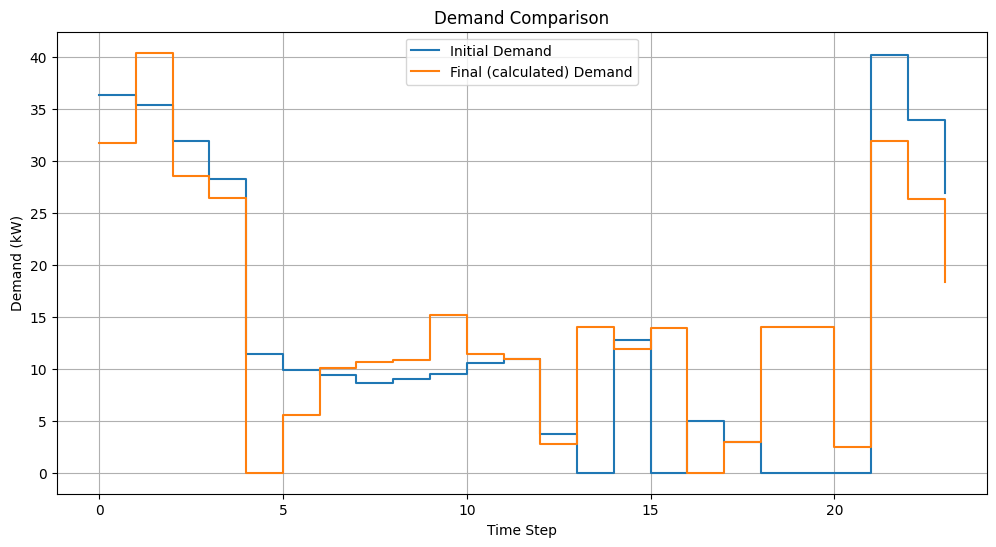

In [4]:
import matplotlib.pyplot as plt
from pyparsing import col

print(sum(charging_demand))
print([round(float(i),2) for i in pv])
print(len(pv))
plt.figure(figsize=(12, 6))
plt.step(range(24), initial_demand , label='Initial Demand', where='post')
plt.step(range(24), [initial_demand[i] + charging_demand[i] for i in range(24)], label='Final (calculated) Demand', where='post')
# plt.step(range(24), final_grid_demand, label='Final Demand', color='black', where='post')
plt.xlabel('Time Step')
plt.ylabel('Demand (kW)')
plt.title('Demand Comparison')
plt.legend()
plt.grid(True)
plt.show()